In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [153]:
data=pd.read_csv('car_data.csv')

Data shape, describe, info

In [154]:
data.head(10)

,Avtosalon,Qiymet,Valyuta,Şəhər,Marka,Model,Buraxılış ili,Ban növü,Rəng,Mühərrik,...,Yeni,Vəziyyəti,Yeniləndi,Baxışların sayı,Extra,Etrafli,Sahiblər,Hansı bazar üçün yığılıb,Yerlərin sayı,Qəzalı
0,0,13500,AZN,Bakı,Opel,Vectra,2000,Hetçbek,Göy,1.6 L/101 a.g./Benzin,...,Xeyr,"Vuruğu yoxdur, rənglənib",28.05.2023,267,"Yüngül lehimli disklər, ABS, Kondisioner, Dəri...",Salam Barter mümkündür. 1.6 sadə mator mexanik...,2,Avropa,5,NaN
1,1,23500,USD,Bakı,Toyota,Corolla,2023,Sedan,Mavi,1.8 L/178 a.g./Hibrid,...,Bəli,"Vuruğu yoxdur, rənglənməyib",28.05.2023,12410,"Yüngül lehimli disklər, ABS, Yağış sensoru, Mə...",TOYOTA CAROLLA 2023 ALIŞ. 2 İL 80.000 KM ZƏMAN...,1,Rəsmi diler,5,NaN
2,0,33200,AZN,Bakı,Hyundai,Santa Fe,2013,Offroader / SUV,Qara,2.0 L/184 a.g./Dizel,...,Xeyr,"Vuruğu yoxdur, rənglənməyib",28.05.2023,148,"Yüngül lehimli disklər, ABS, Lyuk, Yağış senso...",Yeni gelib bakida surlmuyb qiymet mawin yanind...,1,Avropa,7,NaN
3,0,17000,AZN,Bakı,Ford,Fusion,2015,Sedan,Göy,1.5 L/181 a.g./Benzin,...,Xeyr,"Vuruğu yoxdur, rənglənməyib",25.05.2023,3358,"Yüngül lehimli disklər, ABS, Yağış sensoru, Mə...",Maşın xanım tərəfindən idarə olunub,NaN,NaN,NaN,NaN
4,0,36000,USD,Bakı,Toyota,RAV4,2022,Offroader / SUV,Qara,2.0 L/173 a.g./Benzin,...,Bəli,"Vuruğu yoxdur, rənglənməyib",28.05.2023,16183,"Yüngül lehimli disklər, ABS, Yağış sensoru, Mə...",Rəsmi dilerdən 10 il və ya 160.000 km zəmanəti...,1,NaN,5,NaN
5,0,25000,AZN,Bakı,Mercedes,E 200,2007,Sedan,Gümüşü,1.8 L/184 a.g./Benzin,...,Xeyr,"Vuruğu yoxdur, rənglənməyib",27.05.2023,1141,"Yüngül lehimli disklər, ABS, Lyuk, Yağış senso...",Avtomobil Almaniyadan yeni gelib. Ideal veziyy...,NaN,Avropa,NaN,NaN
6,0,27900,AZN,Bakı,Chevrolet,Equinox,2017,Offroader / SUV,Tünd qırmızı,1.5 L/170 a.g./Benzin,...,Xeyr,"Vuruğu yoxdur, rənglənməyib",26.05.2023,128,"Yüngül lehimli disklər, ABS, Yağış sensoru, Mə...",Azerbaycana yeni gelib hec bir xerc teleb etmi...,1,Amerika,5,NaN
7,0,13400,AZN,Bakı,Opel,Astra,2009,Hetçbek,Boz,1.4 L/90 a.g./Benzin,...,Xeyr,"Vuruğu yoxdur, rənglənməyib",27.05.2023,1282,"Yüngül lehimli disklər, ABS, Mərkəzi qapanma, ...",Almanyadan yeni gelib Gömrük olnub nömre alnib...,NaN,NaN,NaN,NaN
8,0,26500,USD,Bakı,BMW,520,2016,Sedan,Göy,2.0 L/184 a.g./Dizel,...,Xeyr,"Vuruğu yoxdur, rənglənməyib",26.05.2023,9807,"Yüngül lehimli disklər, ABS, Lyuk, Yağış senso...",Masin idial veziyyetdedi hec bir prablemi yoxd...,NaN,Koreya,5,NaN
9,0,13500,AZN,Bakı,Chevrolet,Cruze,2012,Sedan,Ağ,1.6 L/124 a.g./Benzin,...,Xeyr,"Vuruğu yoxdur, rənglənməyib",27.05.2023,6478,"Yüngül lehimli disklər, ABS, Mərkəzi qapanma, ...",MAŞIN ÇOX TƏCİLİ SATILIR!!! Maşın rəsmi servis...,1,Rəsmi diler,4,NaN


In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Avtosalon                 10000 non-null  int64 
 1   Qiymet                    10000 non-null  int64 
 2   Valyuta                   10000 non-null  object
 3   Şəhər                     10000 non-null  object
 4   Marka                     10000 non-null  object
 5   Model                     10000 non-null  object
 6   Buraxılış ili             10000 non-null  int64 
 7   Ban növü                  10000 non-null  object
 8   Rəng                      10000 non-null  object
 9   Mühərrik                  10000 non-null  object
 10  Yürüş                     10000 non-null  object
 11  Sürətlər qutusu           10000 non-null  object
 12  Ötürücü                   10000 non-null  object
 13  Yeni                      10000 non-null  object
 14  Vəziyyəti              

In [156]:
data.describe()

,Avtosalon,Qiymet,Buraxılış ili,Baxışların sayı
count,10000.00000,10000.000000,10000.000000,10000.000000
mean,0.25370,27318.521400,2010.067900,4328.818800
std,0.43515,28995.789851,8.386246,13383.511716
min,0.00000,1100.000000,1938.000000,41.000000
25%,0.00000,12700.000000,2006.000000,408.750000
50%,0.00000,21000.000000,2011.000000,1164.500000
75%,1.00000,32500.000000,2015.000000,3500.250000
max,1.00000,850000.000000,2023.000000,334547.000000


In [157]:
data.shape

(10000, 23)

Data Cleaning and Preprocessing

In [158]:
data.isnull().sum()

,0
Avtosalon,0
Qiymet,0
Valyuta,0
Şəhər,0
Marka,0
Model,0
Buraxılış ili,0
Ban növü,0
Rəng,0
Mühərrik,0


Data same columns dropped

In [159]:
data = data.drop(columns = ['Qəzalı', 'Yeniləndi', 'Yeni', 'Baxışların sayı', 'Avtosalon','Etrafli','Sahiblər','Şəhər'])

In [110]:
data.columns

Index(['Qiymet', 'Valyuta', 'Marka', 'Model', 'Buraxılış ili', 'Ban növü',
       'Rəng', 'Mühərrik', 'Yürüş', 'Sürətlər qutusu', 'Ötürücü', 'Vəziyyəti',
       'Extra', 'Hansı bazar üçün yığılıb', 'Yerlərin sayı'],
      dtype='object')

In [160]:
data['Mühərrik'].value_counts()

,count
Mühərrik,
2.0 L/184 a.g./Dizel,503
1.6 L/75 a.g./Benzin,321
2.0 L/245 a.g./Benzin,265
1.5 L/76 a.g./Hibrid,180
1.4 L/90 a.g./Benzin,169
...,...
1.5 L/152 a.g./Benzin,1
1.9 L/125 a.g./Dizel,1
1.3 L/90 a.g./Hibrid,1


In [161]:
# Split only engine volume and fuel type
data[["Motor_Hecmi", "Yanacaq_Novu"]] = data["Mühərrik"].str.extract(r"(\d+\.\d+)\s*L/\d+\s*a\.g\./(.+)")

data["Motor_Hecmi"] = data["Motor_Hecmi"].astype(float)
data["Yanacaq_Novu"] = data["Yanacaq_Novu"].str.strip()

data.drop(columns=["Mühərrik"], inplace=True)

In [162]:
data["Yerlərin sayı"].value_counts()

,count
Yerlərin sayı,
5,4372
7,1194
4,831
3,187
2,115
8+,74
6,40
1,19


In [163]:
data["Yerlərin sayı"] = data["Yerlərin sayı"].replace("8+", 8)

data["Yerlərin sayı"] = data["Yerlərin sayı"].astype(float)

In [164]:
train_data = data[data["Yerlərin sayı"].notna()]
test_data = data[data["Yerlərin sayı"].isna()]

In [165]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=42)
model.fit(train_data[["Motor_Hecmi"]], train_data["Yerlərin sayı"])

DecisionTreeRegressor(random_state=42)

In [167]:
predicted = model.predict(test_data[["Motor_Hecmi"]])
predicted_rounded = np.round(predicted)

data.loc[test_data.index, "Yerlərin sayı"] = predicted_rounded

In [168]:
data["Yerlərin sayı"].value_counts()

,count
Yerlərin sayı,
5.0,7114
7.0,1246
4.0,851
6.0,313
3.0,205
2.0,176
8.0,76
1.0,19


In [169]:
percent_distribution = data["Yerlərin sayı"].value_counts(normalize=True) * 100
print(percent_distribution)

Yerlərin sayı
5.0    71.14
7.0    12.46
4.0     8.51
6.0     3.13
3.0     2.05
2.0     1.76
8.0     0.76
1.0     0.19
Name: proportion, dtype: float64


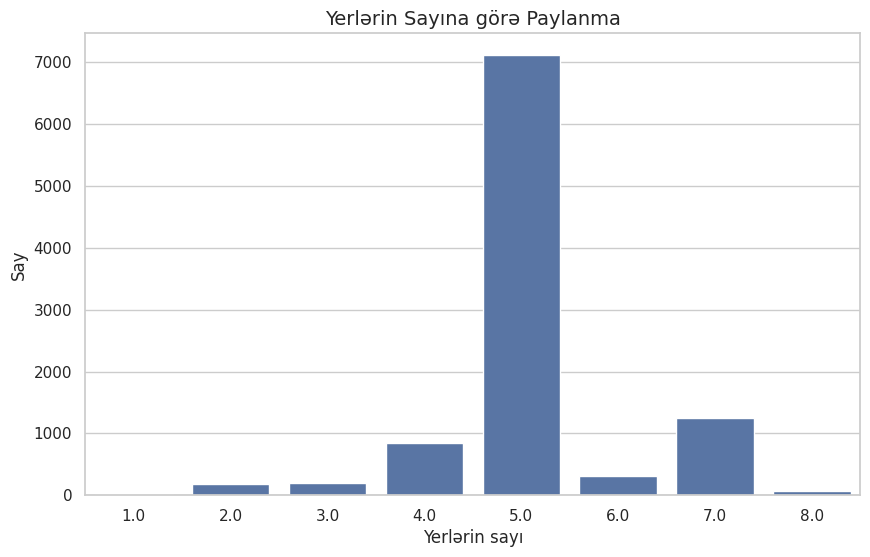

In [170]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x="Yerlərin sayı", order=sorted(data["Yerlərin sayı"].unique()))
plt.title("Yerlərin Sayına görə Paylanma", fontsize=14)
plt.xlabel("Yerlərin sayı", fontsize=12)
plt.ylabel("Say", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()


In [171]:
data.isnull().sum()

,0
Qiymet,0
Valyuta,0
Marka,0
Model,0
Buraxılış ili,0
Ban növü,0
Rəng,0
Yürüş,0
Sürətlər qutusu,0
Ötürücü,0


In [172]:
data['Vəziyyəti'].value_counts()

,count
Vəziyyəti,
"Vuruğu yoxdur, rənglənməyib",9157
"Vuruğu yoxdur, rənglənib",696
"Vuruğu var, rənglənib",73
"Vuruğu var, rənglənməyib",46


In [173]:
data = data.dropna(subset=["Vəziyyəti"])

In [174]:
data['Hansı bazar üçün yığılıb'].value_counts()

,count
Hansı bazar üçün yığılıb,
Avropa,2086
Rəsmi diler,1447
Amerika,1311
Koreya,697
Rusiya,497
Digər,381
Yaponiya,203
Dubay,79


In [175]:
data['Hansı bazar üçün yığılıb'] = data['Hansı bazar üçün yığılıb'].fillna('unknown')

In [176]:
data.isnull().sum()

,0
Qiymet,0
Valyuta,0
Marka,0
Model,0
Buraxılış ili,0
Ban növü,0
Rəng,0
Yürüş,0
Sürətlər qutusu,0
Ötürücü,0


In [177]:
data.isnull().sum()

,0
Qiymet,0
Valyuta,0
Marka,0
Model,0
Buraxılış ili,0
Ban növü,0
Rəng,0
Yürüş,0
Sürətlər qutusu,0
Ötürücü,0


In [178]:
data["Extra"].value_counts()

,count
Extra,
"Yüngül lehimli disklər, ABS, Lyuk, Yağış sensoru, Mərkəzi qapanma, Park radarı, Kondisioner, Oturacaqların isidilməsi, Dəri salon, Ksenon lampalar, Arxa görüntü kamerası, Yan pərdələr, Oturacaqların ventilyasiyası",1827
"Yüngül lehimli disklər, ABS, Lyuk, Yağış sensoru, Mərkəzi qapanma, Park radarı, Kondisioner, Oturacaqların isidilməsi, Dəri salon, Ksenon lampalar, Arxa görüntü kamerası, Oturacaqların ventilyasiyası",391
"Yüngül lehimli disklər, ABS, Lyuk, Yağış sensoru, Mərkəzi qapanma, Park radarı, Kondisioner, Oturacaqların isidilməsi, Dəri salon, Ksenon lampalar, Arxa görüntü kamerası, Yan pərdələr",338
"Yüngül lehimli disklər, ABS, Lyuk, Yağış sensoru, Mərkəzi qapanma, Park radarı, Kondisioner, Oturacaqların isidilməsi, Dəri salon, Ksenon lampalar, Arxa görüntü kamerası",324
"Yüngül lehimli disklər, ABS, Yağış sensoru, Mərkəzi qapanma, Park radarı, Kondisioner, Oturacaqların isidilməsi, Dəri salon, Ksenon lampalar, Arxa görüntü kamerası, Yan pərdələr, Oturacaqların ventilyasiyası",324
...,...
"Lyuk, Mərkəzi qapanma, Kondisioner, Oturacaqların isidilməsi, Dəri salon, Oturacaqların ventilyasiyası",1
"Yüngül lehimli disklər, ABS, Yağış sensoru, Park radarı, Kondisioner, Oturacaqların isidilməsi, Dəri salon, Ksenon lampalar, Arxa görüntü kamerası",1
"ABS, Mərkəzi qapanma, Oturacaqların isidilməsi, Ksenon lampalar",1


In [179]:
data['Extra'].isna().sum()

np.int64(762)

In [185]:
data["Extra"] = data["Extra"].fillna("")
print(data)

      Qiymet Valyuta       Marka        Model  Buraxılış ili         Ban növü  \
0      13500     AZN        Opel       Vectra           2000          Hetçbek   
1      23500     USD      Toyota      Corolla           2023            Sedan   
2      33200     AZN     Hyundai     Santa Fe           2013  Offroader / SUV   
3      17000     AZN        Ford       Fusion           2015            Sedan   
4      36000     USD      Toyota         RAV4           2022  Offroader / SUV   
...      ...     ...         ...          ...            ...              ...   
9995   22900     USD         BMW          528           2016            Sedan   
9996   98000     USD  Land Rover  Range Rover           2019  Offroader / SUV   
9997    9800     AZN   Chevrolet      Lacetti           2007            Sedan   
9998   17800     AZN     Hyundai       Tucson           2007  Offroader / SUV   
9999    5000     AZN  LADA (VAZ)         2107           2004            Sedan   

        Rəng       Yürüş Sü

In [186]:
data.isnull().sum()

,0
Qiymet,0
Valyuta,0
Marka,0
Model,0
Buraxılış ili,0
Ban növü,0
Rəng,0
Yürüş,0
Sürətlər qutusu,0
Ötürücü,0


In [189]:
features_lists = data['Extra'].apply(lambda x: [item.strip() for item in x.split(',')])

In [190]:
all_features = set()
for features in features_lists:
    all_features.update(features)

In [191]:
for feature in all_features:
    data[feature] = features_lists.apply(lambda x: 1 if feature in x else 0)

In [192]:
def one_hot_extras(data, column='Extra'):
    data[column] = data[column].fillna('')  # Nan-ları boş stringə çevir
    features_lists = data[column].apply(lambda x: [item.strip() for item in x.split(',') if item.strip()])

    all_features = set()
    for features in features_lists:
        all_features.update(features)

    for feature in all_features:
        data[feature] = features_lists.apply(lambda x: 1 if feature in x else 0)

    return data


In [194]:
data.isnull().sum()

,0
Qiymet,0
Valyuta,0
Marka,0
Model,0
Buraxılış ili,0
Ban növü,0
Rəng,0
Yürüş,0
Sürətlər qutusu,0
Ötürücü,0


In [195]:
data = data.dropna(subset=['Motor_Hecmi', 'Yanacaq_Novu'])

In [207]:
data.drop(columns=["Extra"], inplace=True)

<ipython-input-207-4138116695>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=["Extra"], inplace=True)


In [208]:
data.shape

(9876, 28)

In [209]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9876 entries, 0 to 9999
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Qiymet                        9876 non-null   float64
 1   Marka                         9876 non-null   object 
 2   Model                         9876 non-null   object 
 3   Buraxılış ili                 9876 non-null   int64  
 4   Ban növü                      9876 non-null   object 
 5   Rəng                          9876 non-null   object 
 6   Sürətlər qutusu               9876 non-null   object 
 7   Ötürücü                       9876 non-null   object 
 8   Vəziyyəti                     9876 non-null   object 
 9   Hansı bazar üçün yığılıb      9876 non-null   object 
 10  Yerlərin sayı                 9876 non-null   float64
 11  Motor_Hecmi                   9876 non-null   float64
 12  Yanacaq_Novu                  9876 non-null   object 
 13  ABS     

In [199]:
data.head(20)

,Qiymet,Valyuta,Marka,Model,Buraxılış ili,Ban növü,Rəng,Yürüş,Sürətlər qutusu,Ötürücü,...,Park radarı,Yağış sensoru,Arxa görüntü kamerası,Ksenon lampalar,Dəri salon,Lyuk,Yan pərdələr,Kondisioner,Yüngül lehimli disklər,Oturacaqların ventilyasiyası
0,13500,AZN,Opel,Vectra,2000,Hetçbek,Göy,370 000 km,Mexaniki,Ön,...,0,0,0,1,1,0,1,1,1,0
1,23500,USD,Toyota,Corolla,2023,Sedan,Mavi,0 km,Avtomat,Ön,...,1,1,1,1,0,0,1,1,1,1
2,33200,AZN,Hyundai,Santa Fe,2013,Offroader / SUV,Qara,168 636 km,Avtomat,Ön,...,1,1,1,1,1,1,1,1,1,1
3,17000,AZN,Ford,Fusion,2015,Sedan,Göy,120 873 km,Avtomat,Ön,...,1,1,1,1,0,0,1,1,1,0
4,36000,USD,Toyota,RAV4,2022,Offroader / SUV,Qara,0 km,Avtomat,Ön,...,1,1,1,1,1,0,0,1,1,0
5,25000,AZN,Mercedes,E 200,2007,Sedan,Gümüşü,204 000 km,Avtomat,Arxa,...,1,1,0,1,1,1,0,1,1,1
6,27900,AZN,Chevrolet,Equinox,2017,Offroader / SUV,Tünd qırmızı,45 000 km,Avtomat,Tam,...,1,1,1,1,0,0,1,1,1,1
7,13400,AZN,Opel,Astra,2009,Hetçbek,Boz,153 896 km,Mexaniki,Ön,...,0,0,0,1,0,0,0,1,1,1
8,26500,USD,BMW,520,2016,Sedan,Göy,135 000 km,Avtomat,Arxa,...,1,1,1,1,1,1,1,1,1,1
9,13500,AZN,Chevrolet,Cruze,2012,Sedan,Ağ,150 000 km,Avtomat,Ön,...,0,0,1,0,0,0,0,1,1,0


In [200]:
def convert_usd_to_azn(data, rate=1.7):

    data.loc[data["Valyuta"] == "USD", "Qiymet"] = data.loc[data["Valyuta"] == "USD", "Qiymet"] * rate

    data.drop(columns=["Valyuta"], inplace=True)

    return data

data = convert_usd_to_azn(data)


<ipython-input-200-1997843891>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 39950.  61200.  45050. ...  51000.  38930. 166600.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data["Valyuta"] == "USD", "Qiymet"] = data.loc[data["Valyuta"] == "USD", "Qiymet"] * rate
<ipython-input-200-1997843891>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=["Valyuta"], inplace=True)


In [201]:
data

,Qiymet,Marka,Model,Buraxılış ili,Ban növü,Rəng,Yürüş,Sürətlər qutusu,Ötürücü,Vəziyyəti,...,Park radarı,Yağış sensoru,Arxa görüntü kamerası,Ksenon lampalar,Dəri salon,Lyuk,Yan pərdələr,Kondisioner,Yüngül lehimli disklər,Oturacaqların ventilyasiyası
0,13500.0,Opel,Vectra,2000,Hetçbek,Göy,370 000 km,Mexaniki,Ön,"Vuruğu yoxdur, rənglənib",...,0,0,0,1,1,0,1,1,1,0
1,39950.0,Toyota,Corolla,2023,Sedan,Mavi,0 km,Avtomat,Ön,"Vuruğu yoxdur, rənglənməyib",...,1,1,1,1,0,0,1,1,1,1
2,33200.0,Hyundai,Santa Fe,2013,Offroader / SUV,Qara,168 636 km,Avtomat,Ön,"Vuruğu yoxdur, rənglənməyib",...,1,1,1,1,1,1,1,1,1,1
3,17000.0,Ford,Fusion,2015,Sedan,Göy,120 873 km,Avtomat,Ön,"Vuruğu yoxdur, rənglənməyib",...,1,1,1,1,0,0,1,1,1,0
4,61200.0,Toyota,RAV4,2022,Offroader / SUV,Qara,0 km,Avtomat,Ön,"Vuruğu yoxdur, rənglənməyib",...,1,1,1,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,38930.0,BMW,528,2016,Sedan,Qara,100 000 km,Avtomat,Arxa,"Vuruğu yoxdur, rənglənməyib",...,0,1,0,1,1,1,1,1,1,0
9996,166600.0,Land Rover,Range Rover,2019,Offroader / SUV,Qara,84 000 km,Avtomat,Tam,"Vuruğu yoxdur, rənglənməyib",...,1,1,1,1,1,1,1,1,1,1
9997,9800.0,Chevrolet,Lacetti,2007,Sedan,Gümüşü,299 785 km,Avtomat,Ön,"Vuruğu yoxdur, rənglənməyib",...,1,0,1,0,0,0,0,1,1,0
9998,17800.0,Hyundai,Tucson,2007,Offroader / SUV,Gümüşü,181 500 km,Avtomat,Ön,"Vuruğu yoxdur, rənglənməyib",...,1,1,1,1,1,0,0,1,1,1


In [202]:
import re

def clean_yurus(val):
    if pd.isna(val): return np.nan
    val = str(val).lower().replace("km", "").replace(" ", "")
    val = val.replace(',', '.')

    match = re.search(r"[\d\.]+", val)
    if not match: return np.nan

    num = float(match.group())
    return num * 1000 if "min" in val else num

data["Yurus_Clean"] = data["Yürüş"].apply(clean_yurus)

<ipython-input-202-3097222401>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Yurus_Clean"] = data["Yürüş"].apply(clean_yurus)


In [203]:
data.drop(columns=["Yürüş"], inplace=True)
data.rename(columns={"Yurus_Clean": "Yürüş"}, inplace=True)

<ipython-input-203-362819472>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=["Yürüş"], inplace=True)
<ipython-input-203-362819472>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={"Yurus_Clean": "Yürüş"}, inplace=True)


In [204]:
data

,Qiymet,Marka,Model,Buraxılış ili,Ban növü,Rəng,Sürətlər qutusu,Ötürücü,Vəziyyəti,Extra,...,Yağış sensoru,Arxa görüntü kamerası,Ksenon lampalar,Dəri salon,Lyuk,Yan pərdələr,Kondisioner,Yüngül lehimli disklər,Oturacaqların ventilyasiyası,Yürüş
0,13500.0,Opel,Vectra,2000,Hetçbek,Göy,Mexaniki,Ön,"Vuruğu yoxdur, rənglənib","Yüngül lehimli disklər, ABS, Kondisioner, Dəri...",...,0,0,1,1,0,1,1,1,0,370000.0
1,39950.0,Toyota,Corolla,2023,Sedan,Mavi,Avtomat,Ön,"Vuruğu yoxdur, rənglənməyib","Yüngül lehimli disklər, ABS, Yağış sensoru, Mə...",...,1,1,1,0,0,1,1,1,1,0.0
2,33200.0,Hyundai,Santa Fe,2013,Offroader / SUV,Qara,Avtomat,Ön,"Vuruğu yoxdur, rənglənməyib","Yüngül lehimli disklər, ABS, Lyuk, Yağış senso...",...,1,1,1,1,1,1,1,1,1,168636.0
3,17000.0,Ford,Fusion,2015,Sedan,Göy,Avtomat,Ön,"Vuruğu yoxdur, rənglənməyib","Yüngül lehimli disklər, ABS, Yağış sensoru, Mə...",...,1,1,1,0,0,1,1,1,0,120873.0
4,61200.0,Toyota,RAV4,2022,Offroader / SUV,Qara,Avtomat,Ön,"Vuruğu yoxdur, rənglənməyib","Yüngül lehimli disklər, ABS, Yağış sensoru, Mə...",...,1,1,1,1,0,0,1,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,38930.0,BMW,528,2016,Sedan,Qara,Avtomat,Arxa,"Vuruğu yoxdur, rənglənməyib","Yüngül lehimli disklər, ABS, Lyuk, Yağış senso...",...,1,0,1,1,1,1,1,1,0,100000.0
9996,166600.0,Land Rover,Range Rover,2019,Offroader / SUV,Qara,Avtomat,Tam,"Vuruğu yoxdur, rənglənməyib","Yüngül lehimli disklər, ABS, Lyuk, Yağış senso...",...,1,1,1,1,1,1,1,1,1,84000.0
9997,9800.0,Chevrolet,Lacetti,2007,Sedan,Gümüşü,Avtomat,Ön,"Vuruğu yoxdur, rənglənməyib","Yüngül lehimli disklər, ABS, Mərkəzi qapanma, ...",...,0,1,0,0,0,0,1,1,0,299785.0
9998,17800.0,Hyundai,Tucson,2007,Offroader / SUV,Gümüşü,Avtomat,Ön,"Vuruğu yoxdur, rənglənməyib","Yüngül lehimli disklər, ABS, Yağış sensoru, Mə...",...,1,1,1,1,0,0,1,1,1,181500.0


Correlation with Qiymet:
 Qiymet                          1.000000
Buraxılış ili                   0.437366
Motor_Hecmi                     0.370668
Dəri salon                      0.341346
Arxa görüntü kamerası           0.333511
Oturacaqların isidilməsi        0.333186
Park radarı                     0.319031
Oturacaqların ventilyasiyası    0.318110
Lyuk                            0.311980
Ksenon lampalar                 0.290205
Yağış sensoru                   0.284140
Kondisioner                     0.195143
Yerlərin sayı                   0.193890
Mərkəzi qapanma                 0.179326
ABS                             0.177627
Yüngül lehimli disklər          0.156139
Yan pərdələr                    0.132972
                               -0.106785
Yürüş                          -0.352337
Name: Qiymet, dtype: float64


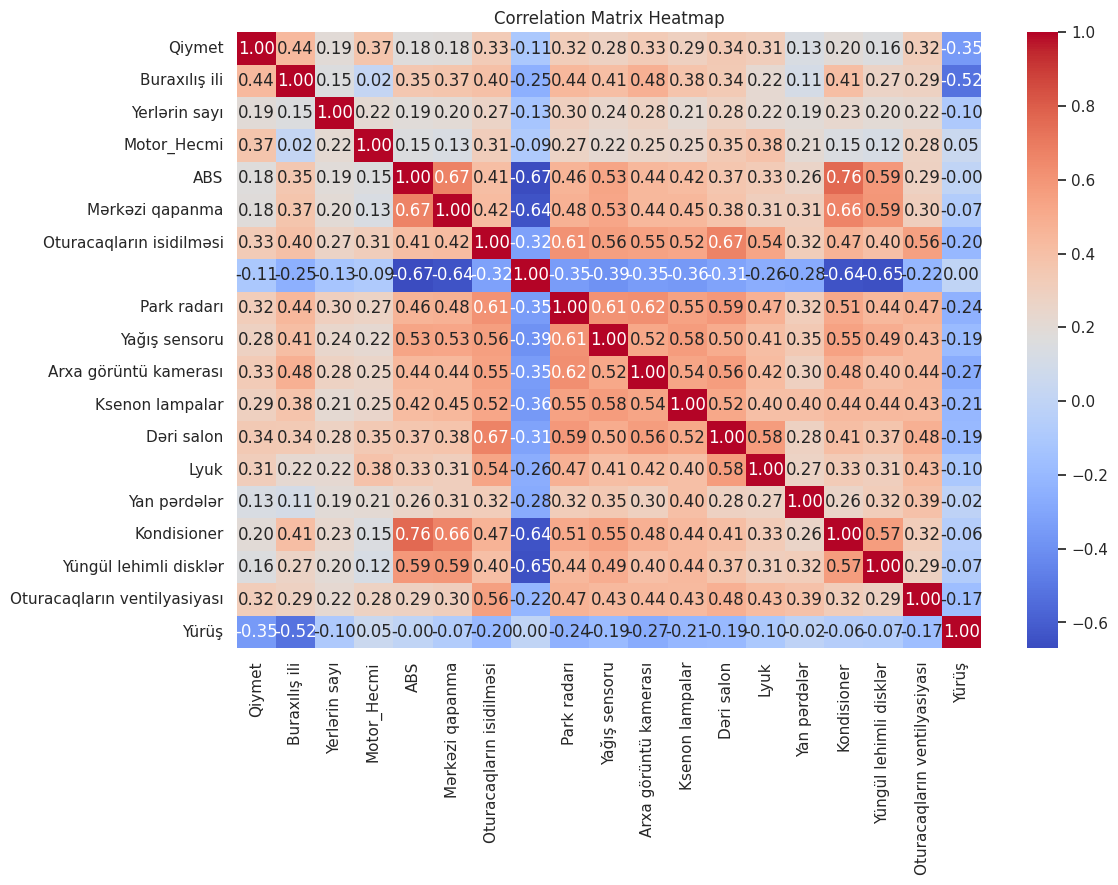

In [206]:
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

corr_matrix = data[numeric_cols].corr()

corr = data.corr(numeric_only=True)["Qiymet"].sort_values(ascending=False)
print("Correlation with Qiymet:\n", corr)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [ ]:
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", categorical_cols)


Categorical columns: ['Ban növü', 'Rəng', 'Sürətlər qutusu', 'Ötürücü', 'Vəziyyəti', 'Extra', 'Yanacaq_Novu', 'Brand_Model']


In [ ]:
import pandas as pd

#Frequency Encoding for 'Brand_Model'
freq_encoding = data['Brand_Model'].value_counts().to_dict()
data['Brand_Model_FE'] = data['Brand_Model'].map(freq_encoding)

# One-Hot Encoding for nominal categorical columns
nominal_cols = ['Ban növü', 'Rəng', 'Sürətlər qutusu', 'Ötürücü', 'Yanacaq_Novu']
data = pd.get_dummies(data, columns=nominal_cols, drop_first=True)

# Label Encoding for 'Vəziyyəti' (ordinal-type categorical feature)
data['Vəziyyəti'] = data['Vəziyyəti'].map({
    'Vuruğu yoxdur, rənglənməyib': 3,
    'Vuruğu yoxdur, rənglənib': 2,
    'Vuruğu var, rənglənib': 1,
    'Vuruğu var, rənglənməyib': 0
})

# Drop original 'Brand_Model' column
data.drop(columns=['Brand_Model'], inplace=True)


print(f"Data shape after encoding: {data.shape}")

Data shape after encoding: (9972, 66)


In [ ]:
data

,Qiymet,Buraxılış ili,Vəziyyəti,Extra,Yerlərin sayı,ABS,Arxa görüntü kamerası,Dəri salon,Kondisioner,Ksenon lampalar,...,Sürətlər qutusu_Robotlaşdırılmış,Sürətlər qutusu_Variator,Ötürücü_Tam,Ötürücü_Ön,Yanacaq_Novu_Dizel,Yanacaq_Novu_Elektro,Yanacaq_Novu_Hibrid,Yanacaq_Novu_Plug-in Hibrid,Yanacaq_Novu_Qaz,Yanacaq_Novu_unknown
0,13500.0,2000,2,"Yüngül lehimli disklər, ABS, Kondisioner, Dəri...",5,1.0,0.0,1.0,1.0,1.0,...,False,False,False,True,False,False,False,False,False,False
1,39950.0,2023,3,"Yüngül lehimli disklər, ABS, Yağış sensoru, Mə...",5,1.0,1.0,0.0,1.0,1.0,...,False,False,False,True,False,False,True,False,False,False
2,33200.0,2013,3,"Yüngül lehimli disklər, ABS, Lyuk, Yağış senso...",7,1.0,1.0,1.0,1.0,1.0,...,False,False,False,True,True,False,False,False,False,False
3,17000.0,2015,3,"Yüngül lehimli disklər, ABS, Yağış sensoru, Mə...",5,1.0,1.0,0.0,1.0,1.0,...,False,False,False,True,False,False,False,False,False,False
4,61200.0,2022,3,"Yüngül lehimli disklər, ABS, Yağış sensoru, Mə...",5,1.0,1.0,1.0,1.0,1.0,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,38930.0,2016,3,"Yüngül lehimli disklər, ABS, Lyuk, Yağış senso...",5,1.0,0.0,1.0,1.0,1.0,...,False,False,False,False,False,False,False,False,False,False
9996,166600.0,2019,3,"Yüngül lehimli disklər, ABS, Lyuk, Yağış senso...",5,1.0,1.0,1.0,1.0,1.0,...,False,False,True,False,False,False,False,False,False,False
9997,9800.0,2007,3,"Yüngül lehimli disklər, ABS, Mərkəzi qapanma, ...",5,1.0,1.0,0.0,1.0,0.0,...,False,False,False,True,False,False,False,False,False,False
9998,17800.0,2007,3,"Yüngül lehimli disklər, ABS, Yağış sensoru, Mə...",5,1.0,1.0,1.0,1.0,1.0,...,False,False,False,True,True,False,False,False,False,False


In [ ]:
data['Buraxılış ili'].value_counts()

,count
Buraxılış ili,
2012,689
2008,682
2013,676
2014,602
2022,563
...,...
1938,1
1970,1
1957,1


In [ ]:
import datetime

current_year = datetime.datetime.now().year
data["Car_Age"] = current_year - data["Buraxılış ili"]

In [ ]:
data = data[data["Car_Age"] <= 50]

In [ ]:
data

,Qiymet,Buraxılış ili,Vəziyyəti,Extra,Yerlərin sayı,ABS,Arxa görüntü kamerası,Dəri salon,Kondisioner,Ksenon lampalar,...,Sürətlər qutusu_Variator,Ötürücü_Tam,Ötürücü_Ön,Yanacaq_Novu_Dizel,Yanacaq_Novu_Elektro,Yanacaq_Novu_Hibrid,Yanacaq_Novu_Plug-in Hibrid,Yanacaq_Novu_Qaz,Yanacaq_Novu_unknown,Car_Age
0,13500.0,2000,2,"Yüngül lehimli disklər, ABS, Kondisioner, Dəri...",5,1.0,0.0,1.0,1.0,1.0,...,False,False,True,False,False,False,False,False,False,25
1,39950.0,2023,3,"Yüngül lehimli disklər, ABS, Yağış sensoru, Mə...",5,1.0,1.0,0.0,1.0,1.0,...,False,False,True,False,False,True,False,False,False,2
2,33200.0,2013,3,"Yüngül lehimli disklər, ABS, Lyuk, Yağış senso...",7,1.0,1.0,1.0,1.0,1.0,...,False,False,True,True,False,False,False,False,False,12
3,17000.0,2015,3,"Yüngül lehimli disklər, ABS, Yağış sensoru, Mə...",5,1.0,1.0,0.0,1.0,1.0,...,False,False,True,False,False,False,False,False,False,10
4,61200.0,2022,3,"Yüngül lehimli disklər, ABS, Yağış sensoru, Mə...",5,1.0,1.0,1.0,1.0,1.0,...,False,False,True,False,False,False,False,False,False,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,38930.0,2016,3,"Yüngül lehimli disklər, ABS, Lyuk, Yağış senso...",5,1.0,0.0,1.0,1.0,1.0,...,False,False,False,False,False,False,False,False,False,9
9996,166600.0,2019,3,"Yüngül lehimli disklər, ABS, Lyuk, Yağış senso...",5,1.0,1.0,1.0,1.0,1.0,...,False,True,False,False,False,False,False,False,False,6
9997,9800.0,2007,3,"Yüngül lehimli disklər, ABS, Mərkəzi qapanma, ...",5,1.0,1.0,0.0,1.0,0.0,...,False,False,True,False,False,False,False,False,False,18
9998,17800.0,2007,3,"Yüngül lehimli disklər, ABS, Yağış sensoru, Mə...",5,1.0,1.0,1.0,1.0,1.0,...,False,False,True,True,False,False,False,False,False,18


In [ ]:
data.drop(columns=["Buraxılış ili"], inplace=True)

<ipython-input-170-944198688988>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=["Buraxılış ili"], inplace=True)


In [ ]:
data

,Qiymet,Vəziyyəti,Extra,Yerlərin sayı,ABS,Arxa görüntü kamerası,Dəri salon,Kondisioner,Ksenon lampalar,Lyuk,...,Sürətlər qutusu_Variator,Ötürücü_Tam,Ötürücü_Ön,Yanacaq_Novu_Dizel,Yanacaq_Novu_Elektro,Yanacaq_Novu_Hibrid,Yanacaq_Novu_Plug-in Hibrid,Yanacaq_Novu_Qaz,Yanacaq_Novu_unknown,Car_Age
0,13500.0,2,"Yüngül lehimli disklər, ABS, Kondisioner, Dəri...",5,1.0,0.0,1.0,1.0,1.0,0.0,...,False,False,True,False,False,False,False,False,False,25
1,39950.0,3,"Yüngül lehimli disklər, ABS, Yağış sensoru, Mə...",5,1.0,1.0,0.0,1.0,1.0,0.0,...,False,False,True,False,False,True,False,False,False,2
2,33200.0,3,"Yüngül lehimli disklər, ABS, Lyuk, Yağış senso...",7,1.0,1.0,1.0,1.0,1.0,1.0,...,False,False,True,True,False,False,False,False,False,12
3,17000.0,3,"Yüngül lehimli disklər, ABS, Yağış sensoru, Mə...",5,1.0,1.0,0.0,1.0,1.0,0.0,...,False,False,True,False,False,False,False,False,False,10
4,61200.0,3,"Yüngül lehimli disklər, ABS, Yağış sensoru, Mə...",5,1.0,1.0,1.0,1.0,1.0,0.0,...,False,False,True,False,False,False,False,False,False,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,38930.0,3,"Yüngül lehimli disklər, ABS, Lyuk, Yağış senso...",5,1.0,0.0,1.0,1.0,1.0,1.0,...,False,False,False,False,False,False,False,False,False,9
9996,166600.0,3,"Yüngül lehimli disklər, ABS, Lyuk, Yağış senso...",5,1.0,1.0,1.0,1.0,1.0,1.0,...,False,True,False,False,False,False,False,False,False,6
9997,9800.0,3,"Yüngül lehimli disklər, ABS, Mərkəzi qapanma, ...",5,1.0,1.0,0.0,1.0,0.0,0.0,...,False,False,True,False,False,False,False,False,False,18
9998,17800.0,3,"Yüngül lehimli disklər, ABS, Yağış sensoru, Mə...",5,1.0,1.0,1.0,1.0,1.0,0.0,...,False,False,True,True,False,False,False,False,False,18


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9951 entries, 0 to 9999
Data columns (total 66 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Qiymet                            9951 non-null   float64
 1   Vəziyyəti                         9951 non-null   int64  
 2   Extra                             9202 non-null   object 
 3   Yerlərin sayı                     9951 non-null   int64  
 4   ABS                               9202 non-null   float64
 5   Arxa görüntü kamerası             9202 non-null   float64
 6   Dəri salon                        9202 non-null   float64
 7   Kondisioner                       9202 non-null   float64
 8   Ksenon lampalar                   9202 non-null   float64
 9   Lyuk                              9202 non-null   float64
 10  Mərkəzi qapanma                   9202 non-null   float64
 11  Oturacaqların isidilməsi          9202 non-null   float64
 12  Oturacaqlar

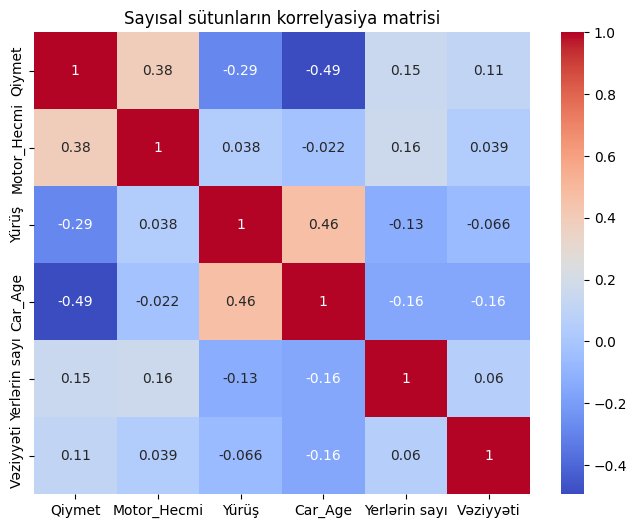

In [ ]:
num_cols = ["Qiymet", "Motor_Hecmi", "Yürüş", "Car_Age", "Yerlərin sayı", "Vəziyyəti"]
corr = data[num_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Sayısal sütunların korrelyasiya matrisi")
plt.show()


In [ ]:
corr_with_target = data.select_dtypes(include='number').corr()["Qiymet"].sort_values(ascending=False)
print(corr_with_target)

Qiymet                          1.000000
Motor_Hecmi                     0.381790
Dəri salon                      0.338311
Oturacaqların isidilməsi        0.337723
Arxa görüntü kamerası           0.335348
Oturacaqların ventilyasiyası    0.322863
Park radarı                     0.319766
Lyuk                            0.317138
Yağış sensoru                   0.282792
Ksenon lampalar                 0.281083
Kondisioner                     0.184922
ABS                             0.161269
Mərkəzi qapanma                 0.160918
Yerlərin sayı                   0.153054
Yüngül lehimli disklər          0.124688
Yan pərdələr                    0.118187
Vəziyyəti                       0.110141
Brand_Model_FE                 -0.151352
Yürüş                          -0.289426
Car_Age                        -0.493687
Name: Qiymet, dtype: float64


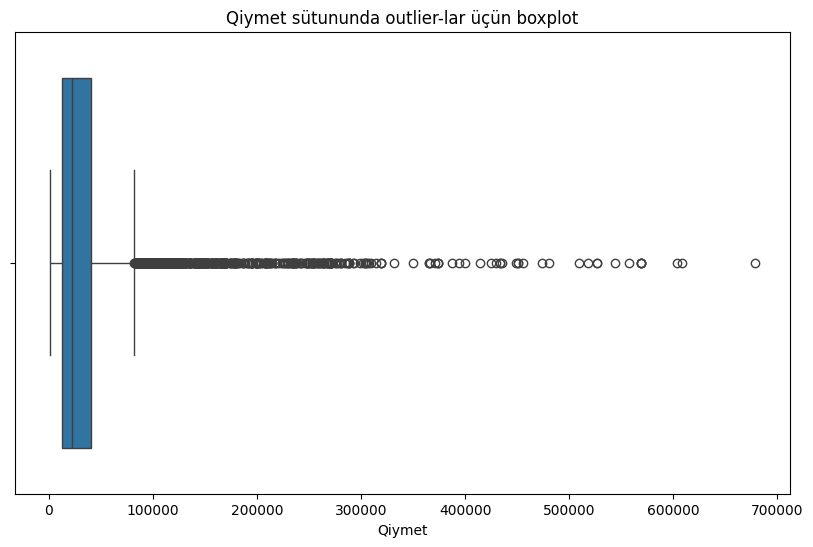

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=data['Qiymet'])
plt.title('Qiymet sütununda outlier-lar üçün boxplot')
plt.show()

In [ ]:
from scipy import stats

z_scores = stats.zscore(data['Qiymet'])
outliers_z = data[(np.abs(z_scores) > 3)]
print(f"Z-score ilə tapılan outlier sayi: {outliers_z.shape[0]}")


Z-score ilə tapılan outlier sayi: 201


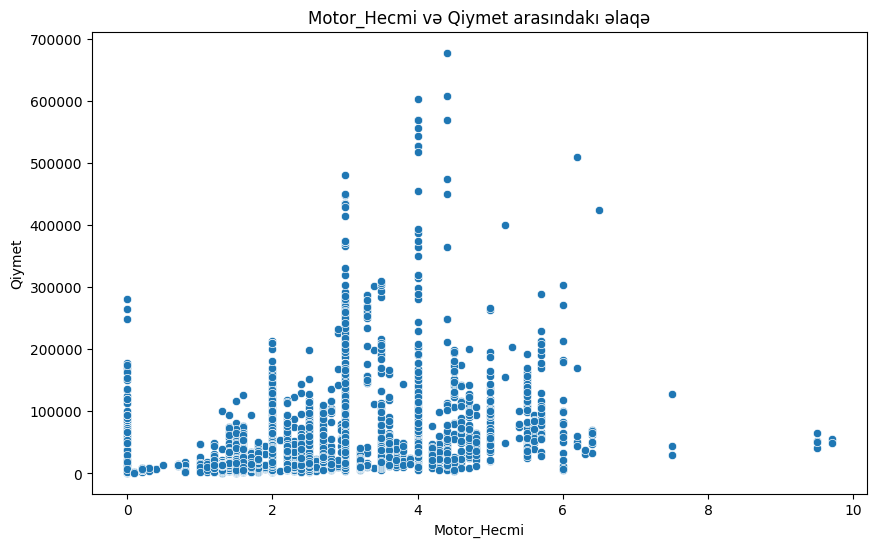

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=data['Motor_Hecmi'], y=data['Qiymet'])
plt.title('Motor_Hecmi və Qiymet arasındakı əlaqə')
plt.show()

In [ ]:
from scipy.spatial import distance

def mahalanobis(x=None, data=None, cov=None):
    x_mu = x - np.mean(data, axis=0)
    if cov is None:
        cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left = np.dot(x_mu, inv_covmat)
    mahal = np.dot(left, x_mu.T)
    return mahal.diagonal()

features = ['Qiymet', 'Motor_Hecmi', 'Yürüş']
data_features = data[features]
data_features = data_features.dropna()

m_dist = mahalanobis(x=data_features, data=data_features)
threshold = np.percentile(m_dist, 99)  # üst 1% outlier kimi qəbul edək
outliers_multi = data_features[m_dist > threshold]
print(f"Çoxölçülü outlier sayi: {outliers_multi.shape[0]}")

Çoxölçülü outlier sayi: 100


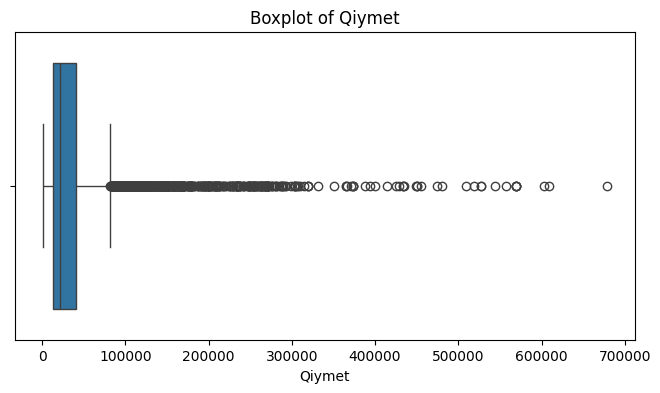

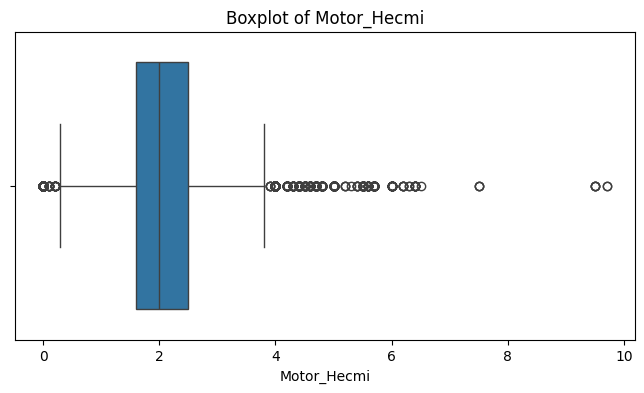

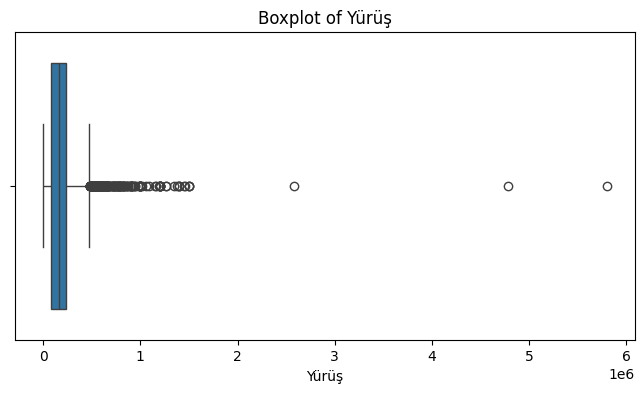

In [ ]:
features = ['Qiymet', 'Motor_Hecmi', 'Yürüş']

for feature in features:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=data[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()


In [ ]:
data = data.copy()

lower_limit = data['Qiymet'].quantile(0.01)
upper_limit = data['Qiymet'].quantile(0.99)

data.loc[:, 'Qiymet'] = data['Qiymet'].clip(lower_limit, upper_limit)

print(data['Qiymet'].describe())

count      9951.000000
mean      35167.291930
std       40858.801654
min        2800.000000
25%       12700.000000
50%       21900.000000
75%       40460.000000
max      253640.000000
Name: Qiymet, dtype: float64


In [ ]:
print("Old min:", data['Qiymet'].min())
print("Old max:", data['Qiymet'].max())

Old min: 2800.0
Old max: 253640.0


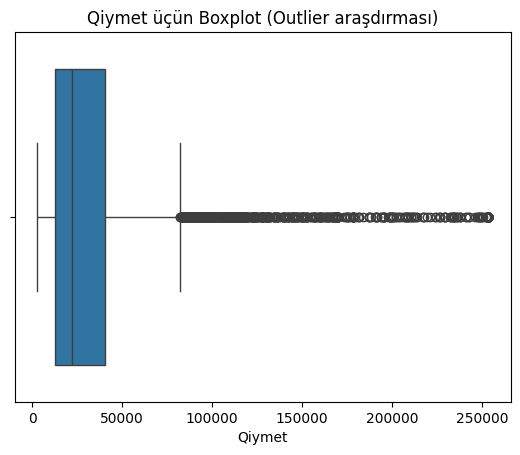

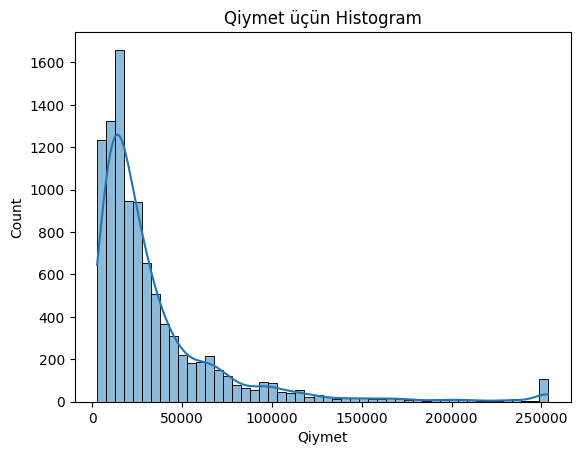

In [ ]:
sns.boxplot(x=data['Qiymet'])
plt.title("Qiymet üçün Boxplot (Outlier araşdırması)")
plt.show()

sns.histplot(data['Qiymet'], bins=50, kde=True)
plt.title("Qiymet üçün Histogram")
plt.show()

In [ ]:
print(data['Qiymet'].quantile(0.99))  # 99% qiymət bundan aşağıdır

253385.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9951 entries, 0 to 9999
Data columns (total 66 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Qiymet                            9951 non-null   float64
 1   Vəziyyəti                         9951 non-null   int64  
 2   Extra                             9202 non-null   object 
 3   Yerlərin sayı                     9951 non-null   int64  
 4   ABS                               9202 non-null   float64
 5   Arxa görüntü kamerası             9202 non-null   float64
 6   Dəri salon                        9202 non-null   float64
 7   Kondisioner                       9202 non-null   float64
 8   Ksenon lampalar                   9202 non-null   float64
 9   Lyuk                              9202 non-null   float64
 10  Mərkəzi qapanma                   9202 non-null   float64
 11  Oturacaqların isidilməsi          9202 non-null   float64
 12  Oturacaqlar

In [ ]:
extra_columns = [
    'ABS', 'Dəri salon', 'Kondisioner', 'Lyuk',
    'Oturacaqların isidilməsi', 'Oturacaqların ventilyasiyası',
    'Park radarı', 'Yan pərdələr', 'Yağış sensoru',
    'Yüngül lehimli disklər', 'Arxa görüntü kamerası'
]

data[extra_columns] = data[extra_columns].fillna(0)
data.drop('Extra', axis=1, inplace=True)

In [ ]:
data.isnull().sum()

,0
Qiymet,0
Vəziyyəti,0
Yerlərin sayı,0
ABS,0
Arxa görüntü kamerası,0
...,...
Yanacaq_Novu_Hibrid,0
Yanacaq_Novu_Plug-in Hibrid,0
Yanacaq_Novu_Qaz,0
Yanacaq_Novu_unknown,0


Modelling

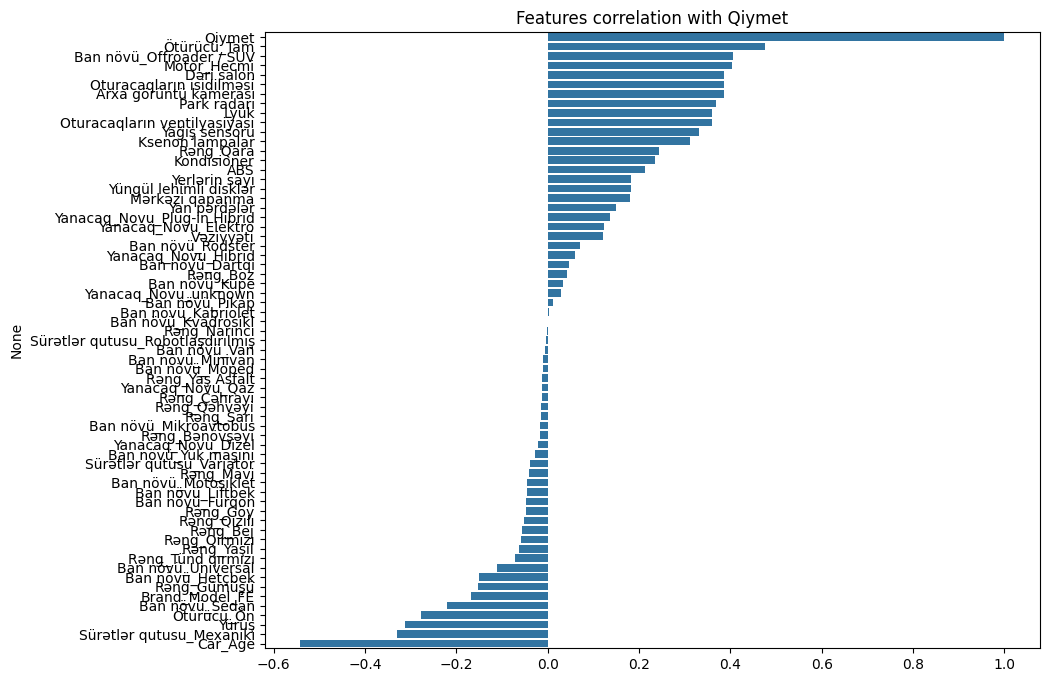

In [ ]:

corr_matrix = data.corr()
corr_target = corr_matrix['Qiymet'].sort_values(ascending=False)

plt.figure(figsize=(10,8))
sns.barplot(x=corr_target.values, y=corr_target.index)
plt.title('Features correlation with Qiymet')
plt.show()

In [ ]:
selected_features = corr_target[abs(corr_target) > 0.1].index.tolist()
selected_features.remove('Qiymet')

print(selected_features)

['Ötürücü_Tam', 'Ban növü_Offroader / SUV', 'Motor_Hecmi', 'Dəri salon', 'Oturacaqların isidilməsi', 'Arxa görüntü kamerası', 'Park radarı', 'Lyuk', 'Oturacaqların ventilyasiyası', 'Yağış sensoru', 'Ksenon lampalar', 'Rəng_Qara', 'Kondisioner', 'ABS', 'Yerlərin sayı', 'Yüngül lehimli disklər', 'Mərkəzi qapanma', 'Yan pərdələr', 'Yanacaq_Novu_Plug-in Hibrid', 'Yanacaq_Novu_Elektro', 'Vəziyyəti', 'Ban növü_Universal', 'Ban növü_Hetçbek', 'Rəng_Gümüşü', 'Brand_Model_FE', 'Ban növü_Sedan', 'Ötürücü_Ön', 'Yürüş', 'Sürətlər qutusu_Mexaniki', 'Car_Age']


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = data[selected_features].fillna(0)
y = data['Qiymet']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

y_pred = model.predict(X_test)

NameError: name 'model' is not defined

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

y_pred = rf.predict(X_test)

mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

r2 = r2_score(y_test, y_pred)

print(f"MAPE: {mape:.2f}%")
print(f"R2 Score: {r2:.2f}")

In [ ]:
pip install catboost

In [ ]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, r2_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


cat_model = CatBoostRegressor(verbose=0, random_state=42)
cat_model.fit(X_train, y_train)
y_pred = cat_model.predict(X_test)

mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"CatBoost MAPE: {mape*100:.2f}%")
print(f"CatBoost R2 Score: {r2:.2f}")

In [ ]:
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_percentage_error, r2_score


cat = CatBoostRegressor(verbose=0, random_state=42)

param_grid = {
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [100, 200]
}

grid_search = GridSearchCV(cat, param_grid, cv=3, scoring='r2', n_jobs=-1)

grid_search.fit(X_train, y_train)


print("Best parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("MAPE:", mean_absolute_percentage_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

In [ ]:
comparison = pd.DataFrame({'Real Price': y_test.values, 'Predicted Price': y_pred})
print(comparison.head())

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R-squared: {r2:.4f}")

In [ ]:
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Real Price')
plt.ylabel('Predicted Price')
plt.title('Real vs Predicted Car Prices')
plt.show()

In [ ]:
# Fərqləri hesablayaq
errors = np.abs(y_test - y_pred)

# Ən çox fərq olan 10 müşahidə
outliers_df = pd.DataFrame({
    'Real Price': y_test,
    'Predicted Price': y_pred,
    'Error': errors
}).sort_values(by='Error', ascending=False).head(10)

print(outliers_df)

In [ ]:
pip install shap

In [ ]:
X_train.dtypes

In [ ]:
X_train = X_train.astype({col: 'int' for col in X_train.select_dtypes('bool').columns})
X_test = X_test.astype({col: 'int' for col in X_test.select_dtypes('bool').columns})

In [ ]:
import shap

explainer = shap.Explainer(rf, X_train)
shap_values = explainer(X_test, check_additivity=False)
shap.summary_plot(shap_values, X_test)

In [ ]:
import pickle

In [ ]:

with open("model.pkl", "wb") as f:
    pickle.dump(model, f)


with open("shap_values.pkl", "wb") as f:
    pickle.dump(shap_values, f)


with open("explainer.pkl", "wb") as f:
    pickle.dump(explainer, f)


In [ ]:
print("SHAP rows:", len(shap_values[1]))
print("X rows:", X.shape[0])
